# Iris Dataset 확인

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

from sklearn import datasets

dataset=datasets.load_iris()

In [2]:
dataset['data']

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [3]:
dataset['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [4]:
dataset['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
dataset['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

# 선형 SVM 분류

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris=datasets.load_iris()

x=iris["data"][:,(2,3)]
y=(iris["target"]==2).astype(np.float64)

Text(0.5, 1.0, 'feature scatter')

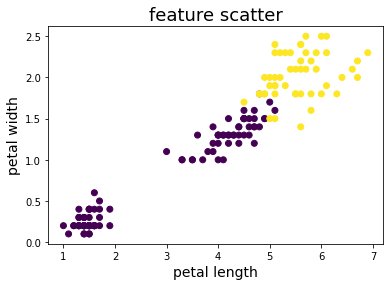

In [7]:
plt.figure()
plt.scatter(x[:,0],x[:,1],c=y) #이게 뭐 하는거지?
plt.xlabel("petal length",fontsize=14)
plt.ylabel("petal width",fontsize=14)
plt.title("feature scatter",fontsize=18)

In [30]:
#pipeline 생성
svm_clf=Pipeline([
    ("scaler",StandardScaler()),
    ("linear_svc",LinearSVC(C=1, loss="hinge",max_iter=50000)),
])

In [31]:
#model fitting
svm_clf.fit(x,y)
print(svm_clf.named_steps["linear_svc"].coef_) #weight 벡터
print(svm_clf.named_steps["linear_svc"].intercept_) #bias

[[1.63328307 2.38786572]]
[-2.50520917]


In [26]:
svm_clf.predict([[3.8,1.7]])

array([0.])

[0.]


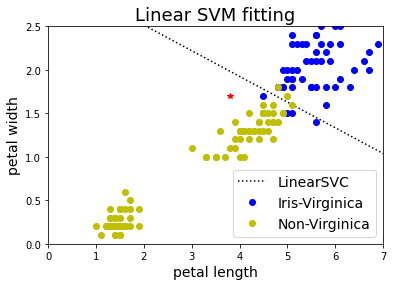

In [32]:
w=-svm_clf.named_steps["linear_svc"].coef_[0,0]/svm_clf.named_steps["linear_svc"].coef_[0,1]
b=-svm_clf.named_steps["linear_svc"].intercept_[0]/svm_clf.named_steps["linear_svc"].coef_[0,1]

line=svm_clf.named_steps["scaler"].inverse_transform([[-5,(-5*w)+b],[5,5*w+b]])

plt.figure()
plt.plot(line[:,0],line[:,1],"k:", label="LinearSVC")
plt.plot(x[:,0][y==1],x[:,1][y==1],'bo',label='Iris-Virginica')
plt.plot(x[:,0][y==0],x[:,1][y==0],'yo',label='Non-Virginica')
plt.plot(3.8,1.7,'r*')
print(svm_clf.predict([[3.8,1.7]]))

plt.xlabel("petal length",fontsize=14)
plt.ylabel("petal width",fontsize=14)
plt.legend(loc='lower right',fontsize=14)
plt.title("Linear SVM fitting",fontsize=18)
plt.axis([0,7,0,2.5])
plt.show()

# 비선형 SVM분류

In [20]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

Text(0.5, 1.0, 'feature scatter')

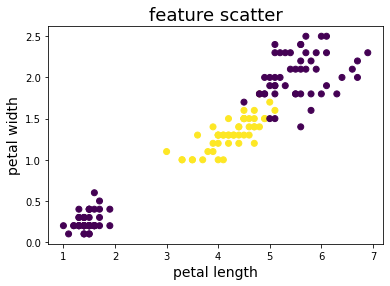

In [21]:
x=iris["data"][:,(2,3)]
y=(iris["target"]==1).astype(np.float64)
plt.figure()
plt.scatter(x[:,0],x[:,1],c=y) #이게 뭐 하는거지?
plt.xlabel("petal length",fontsize=14)
plt.ylabel("petal width",fontsize=14)
plt.title("feature scatter",fontsize=18)

In [22]:
#x,y=make_moons(n_samples=100,noise=0.15)

polynomial_svm_clf=Pipeline([
    ("poly_features", PolynomialFeatures(degree=3)),
    ("scaler",StandardScaler()),
    ("linear_svc",LinearSVC(C=1, loss="hinge",max_iter=50000))
])

polynomial_svm_clf.fit(x,y)

Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge', max_iter=50000))])

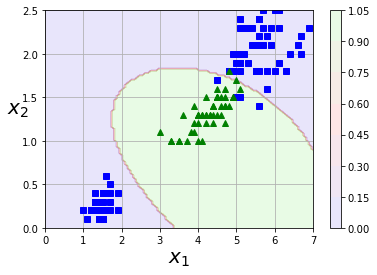

In [25]:
import matplotlib.pyplot as plt

def plot_dataset(x,y,axes):
    plt.plot(x[:,0][y==0],x[:,1][y==0],'bs',label='Non-Virginica')
    plt.plot(x[:,0][y==1],x[:,1][y==1],'g^',label='Iris-Virginica')
    plt.axis(axes)
    plt.grid(True,which='both')
    plt.xlabel(r"$x_1$",fontsize=20)
    plt.ylabel(r"$x_2$",fontsize=20, rotation=0)
    #plt.legend(loc='upper left',fontsize=14)
    
def plot_predictions(clf,axes):
    x0s=np.linspace(axes[0],axes[1],100)
    x1s=np.linspace(axes[2],axes[3],100)
    x0,x1=np.meshgrid(x0s,x1s)
    x=np.c_[x0.ravel(),x1.ravel()]
    y_pred=clf.predict(x).reshape(x0.shape)
    y_decision=clf.decision_function(x).reshape(x0.shape)
    pdct=plt.contourf(x0,x1,y_pred,cmap=plt.cm.brg,alpha=0.1)
    plt.colorbar(pdct)
    
plot_predictions(polynomial_svm_clf,[0,7,0,2.5])
plot_dataset(x,y,[0,7,0,2.5])

plt.show()

# 비선형 SVM 분류 - 다항식 특성 추가(커널 트릭)

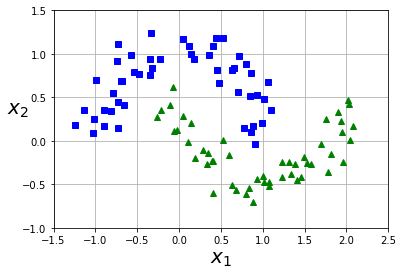

In [34]:
from sklearn.svm import SVC

x,y=make_moons(n_samples=100,noise=0.15)
plot_dataset(x,y,[-1.5,2.5,-1,1.5])

In [41]:
poly_kernel_svm_clf=Pipeline([
    ("scaler",StandardScaler()),
    ("svm_clf",SVC(kernel="poly",degree=3,coef0=1,C=5))
])

poly_kernel_svm_clf.fit(x,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

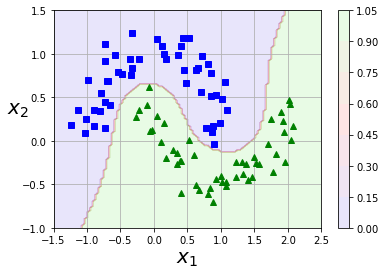

In [42]:
import matplotlib.pyplot as plt

plot_predictions(poly_kernel_svm_clf, [-1.5,2.5,-1,1.5])
plot_dataset(x,y,[-1.5,2.5,-1,1.5])

plt.show()

# 비선형 SVM 분류 - 가우시안 RBF 커널

In [46]:
rbf_kernel_svm_clf=Pipeline([
    ("scaler",StandardScaler()),
    ("svm_clf",SVC(kernel="rbf",gamma=5,C=0.001))
])

rbf_kernel_svm_clf.fit(x,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])

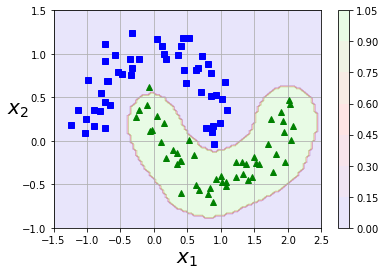

In [47]:
import matplotlib.pyplot as plt

plot_predictions(rbf_kernel_svm_clf,[-1.5,2.5,-1,1.5])
plot_dataset(x,y,[-1.5,2.5,-1,1.5])

plt.show()